In [1]:
# Import necessary libraries
import numpy as np
import pywt                                # This library is used for wavelet transform
import cv2                                 # This library is used for reading images
import os

import matplotlib
from matplotlib import pyplot as plt

In [2]:
def w2d(img, mode='haar', level=1):
    # Convert the BGR image to gray scale
    # Our image is already is float so we don't need to convert it into floating point anymore
    gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    # Convert the gray image to floating point
    # gray_float = np.float32(gray_img)
    # gray_float = gray_float/255
    
    # Get the coefficeint using the python wavelet function provided by pywt
    coeffs = pywt.wavedec2(gray_img, mode, level=level)
    
    # Coefficient Processing
    coefficient = list(coeffs)
    coefficient[0] = coefficient[0] * 0
    
    # Reconstruction of the image
    new_img = pywt.waverec2(coefficient, mode)
    new_img = new_img*255
    new_img = new_img.astype(np.uint8)
    
    return new_img    

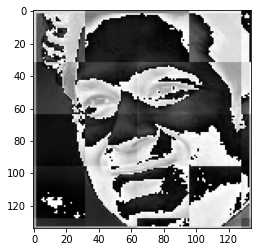

In [3]:
path = os.path.abspath('../dataset/pre_processed_data/sachin_tendulkar/sachin_tendulkar0.png')
img = plt.imread(path)
img_wt = w2d(img, 'db1', level=5)
plt.imshow(img_wt, cmap='gray')

In [5]:
pre_processed_folder = os.path.abspath('../dataset/pre_processed_data/')
size = (32, 32)

data = []
label = []

# Creating a label for the classes
class_label = {}
count = 0

for root, dirs, files in os.walk(pre_processed_folder):
    name = root.split('\\')[-1]
    if name == "pre_processed_data":
        continue
    class_label[name] = count
    count = count + 1
    for filename in files:
        path = os.path.join(root, filename)
        img = cv2.imread(path)
        scaled_img = cv2.resize(img, size)
        
        wavlet_img = w2d(img, mode='db1', level=5)
        scaled_wavlet_img = cv2.resize(wavlet_img, size)
        
        stacked_img = np.vstack((scaled_img.reshape(32*32*3, 1), scaled_wavlet_img.reshape(32*32, 1)))
        data.append(stacked_img)
        label.append(class_label[name])

In [10]:
# Get the data ready for training
data = np.array(data).reshape(len(data), 4096).astype(float)
data

array([[108., 123., 131., ..., 148.,  98., 141.],
       [ 42.,  36.,  29., ...,  67.,  75., 104.],
       [136.,  23.,  24., ...,  79., 135., 140.],
       ...,
       [255.,   0.,   0., ..., 223., 223., 125.],
       [255.,   0.,   0., ..., 191., 191., 191.],
       [ 66.,  88., 191., ...,   8., 248., 214.]])

array([[108],
       [123],
       [131],
       ...,
       [148],
       [ 98],
       [141]], dtype=uint8)